# Data Manipulation with Python

Python is a great language for data analysis. There are several libraries for this purpose, as well as many more maintained by an open source community for topics such data science, machine learning and artificial intelligence.

Let us start by importing these libraries and setting up some options.

## Loading data and libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import random
%matplotlib inline

pd.options.mode.chained_assignment = None

Next, we will load the necessary data into pandas dataframes.

In [17]:
with open('data/thrones.json') as f:
    data = json.load(f)
    
HOUSE_NUMBER = len(data['house'])

chars = pd.DataFrame()

for i in range(HOUSE_NUMBER):
    tmp = pd.DataFrame.from_dict(data['house'][i])
    chars = pd.concat([chars, tmp], ignore_index = True)
    
chars.sample(10)


,name,characters
42,Night's Watch,Pypar
49,Dothraki,Khal Drogo
38,Night's Watch,Karl Tanner
77,Frey,Black Walder Rivers
29,Lannister,Jaime Lannister
10,Stark,Rickon Stark
23,Baratheon,Robert Baratheon
71,Martell,Ellaria Sand
9,Stark,Nymeria
86,White Walkers,Wun Wun Wight


In [18]:
with open('data/gender.json') as f:
    data = json.load(f)

gender = pd.DataFrame()

for i in range(2):
    tmp = pd.DataFrame.from_dict(data['gender'][i])
    gender = pd.concat([gender, tmp], ignore_index = True)
    
gender.head()


,gender,characters
0,male,Alliser Thorne
1,male,Baby Sam
2,male,Balon Greyjoy
3,male,Barristan Selmy
4,male,Benjen Stark


## Table joins and manipulation

After creating two separate objects from different data files, let's perform a join operation to create a richer dataset.

In [19]:
df = chars.merge(gender,
                  left_on = 'characters',
                  right_on = 'characters',
                  how = 'outer')

df = df.rename(index = str,
                     columns = {
                        'name': 'house',
                        'characters': 'name'
             })

df.head()

,house,name,gender
0,Stark,Arya Stark,female
1,Stark,Benjen Stark,male
2,Stark,Bran Stark,male
3,Stark,Catelyn Stark,female
4,Stark,Eddard Stark,male


Now, lets filter for the top five houses with more characters and see which ones remain.

In [20]:
top_houses = df.groupby('house').count().sort_values(by = 'name',
                                                     ascending = False).head()
                                                     

df = df[df['house'].isin(
                        list(top_houses.index)
                        )
                    ]

houses = list(
    np.unique(df['house'])
)

houses

['Baratheon', 'Martell', "Night's Watch", 'Stark', 'Wildling']

However, this dataset is still quite boring and bland, so let's engineer some data and find out how to use the `random` module in Python. In particular, the `.seed()` method is essential to create reproducible results.

In [6]:
df['gold'] = np.nan
df['weapons'] = np.nan

random.seed(2018)

dts = pd.DataFrame()

for i in top_houses.index:
    tmp = df[df['house'] == i]
    tmp['gold_multiplier'] = abs(random.gauss(3, 6))
    tmp['weapons_multiplier'] = abs(random.gauss(3, 6))
    dts = pd.concat([dts, tmp], ignore_index = True)

for i in range(len(dts)):
    dts['gold'][i] = random.gauss(200, 50) * dts['gold_multiplier'][i]
    dts['weapons'][i] = random.gauss(100, 20) * dts['weapons_multiplier'][i]
    
dts.describe()


,gold,weapons,gold_multiplier,weapons_multiplier
count,54.000000,54.000000,54.000000,54.000000
mean,775.143542,379.704098,4.025409,3.833565
std,603.121287,237.266773,2.841246,2.332197
min,192.373603,131.026475,1.608858,1.861520
25%,335.145714,206.155575,1.608858,2.125753
50%,479.125541,287.633198,1.967668,2.705906
75%,1180.534147,521.802530,7.170161,4.593902
max,2429.722650,964.026914,8.392334,8.091569


We could have used `random.randint()` or `random.randrange()`, but a normal distribution should fit this example well.

## Data inspection

Pandas dataframes provide several methods that help assess the characteristics of your dataset.

In [21]:
dts.shape

(54, 7)

In [22]:
dts.size

378

In [23]:
dts.describe()

,gold,weapons,gold_multiplier,weapons_multiplier
count,54.000000,54.000000,54.000000,54.000000
mean,775.143542,379.704098,4.025409,3.833565
std,603.121287,237.266773,2.841246,2.332197
min,192.373603,131.026475,1.608858,1.861520
25%,335.145714,206.155575,1.608858,2.125753
50%,479.125541,287.633198,1.967668,2.705906
75%,1180.534147,521.802530,7.170161,4.593902
max,2429.722650,964.026914,8.392334,8.091569


There are also several statistics-oriented features, such as calculating the Pearson correlation.

In [25]:
corr = dts.corr()
corr

,gold,weapons,gold_multiplier,weapons_multiplier
gold,1.000000,0.568156,0.904188,0.595200
weapons,0.568156,1.000000,0.610304,0.927968
gold_multiplier,0.904188,0.610304,1.000000,0.690004
weapons_multiplier,0.595200,0.927968,0.690004,1.000000


This doesn't look great, so let's make some interesting representations of the data!

## Data visualization

There are several plotting libraries in Python, such as matplotlib, seaborn or chartify. It's helpful to leverage all of their potential to create engaging visualizations.

Thus, correlations are best analyzed as color heatmaps:

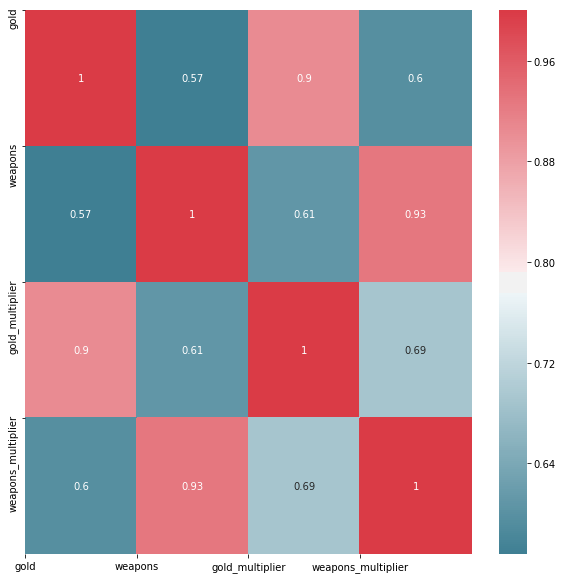

In [35]:
fig, ax = plt.subplots(figsize = (10, 10))

colormap = sns.diverging_palette(220, 10, as_cmap = True)


sns.heatmap(corr, cmap = colormap, annot = True)

plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

Bar or column charts are also quite easy to make with just one line of code.

<BarContainer object of 54 artists>

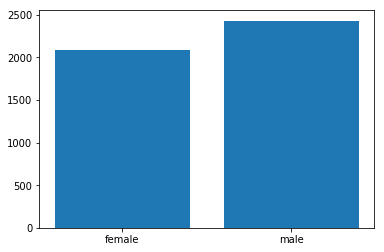

In [39]:
plt.bar(dts['gender'], height = dts['gold'])

With some experience, creating beautiful advanced charts is quite straightforward:

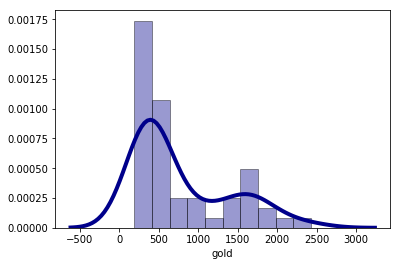

In [12]:
sns.distplot(dts['gold'], hist = True, kde = True, 
             bins = 10, color = 'darkblue', 
             hist_kws = {'edgecolor':'black'},
             kde_kws = {'linewidth': 4})

Text(39.50027777777778, 0.5, 'Gold amount')

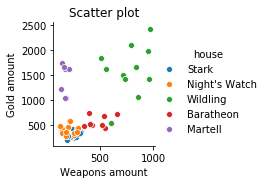

In [48]:
sns.pairplot(x_vars = 'weapons', 
             y_vars = 'gold', 
             data = dts, 
             hue = "house"
)

plt.title('Scatter plot')
plt.xlabel('Weapons amount')
plt.ylabel('Gold amount')

Text(0, 0.5, 'Density')

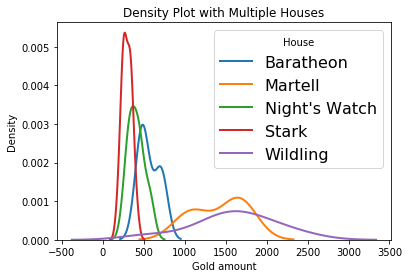

In [43]:
for house in houses:
    subset = dts[dts['house'] == house]
    
    sns.distplot(subset['gold'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = house)
    

plt.legend(prop = {'size': 16}, title = 'House')
plt.title('Density Plot with Multiple Houses')
plt.xlabel('Gold amount')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

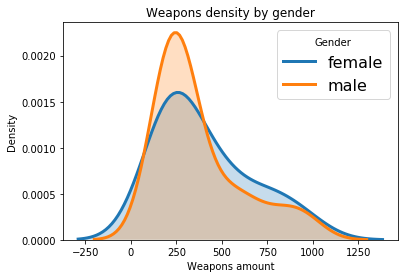

In [44]:
for gender in list(np.unique(dts['gender'])):
    subset = dts[dts['gender'] == gender]

    sns.distplot(subset['weapons'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = gender)
    

plt.legend(prop = {'size': 16}, title = 'Gender')
plt.title('Weapons density by gender')
plt.xlabel('Weapons amount')
plt.ylabel('Density')